# Data

Our data comes from the Center for Medicare \& Medicaid Services 2008-2010 Data Entrepreneurs’ Synthetic Public Use File (DE-SynPUF). The DE-SynPUF was created with the goal of providing a realistic set of claims data in the public domain while providing protection to the Medicare beneficiaries’ protected health information.

The data structure of the Medicare DE-SynPUF is very similar to the CMS Limited Data Sets, but with a smaller number of variables. The DE-SynPUF also provides a robust set of metadata on the CMS claims data that have not been previously available in the public domain. Although the DE-SynPUF has very limited inferential research value to draw conclusions about Medicare beneficiaries due to the synthetic processes used to create the file, the Medicare DE-SynPUF does increase access to a realistic Medicare claims data file in a timely and less expensive manner to spur the innovation necessary to achieve the goals of better care for beneficiaries and improve the health of the population.

## Section 1: Codebook

#### **The Codebook is a human-readable, read-only version of the project's data and serves as a quick reference for viewing the attributes of any given field in the project without having to download and interpret the data.**

- **reimb2010**: Medicare reimbursements (USD) in the year 2010 


- **reimb2008, reimb2009**: A patient's last 2 years of Medicare reimbursements (USD)


- **age2010**: The patient's age at the beginning of 2010


- **male**: Gender (binary)


- **race**: Race (categorical)


- **heart.failure, kidney, cancer, copd, depression, diabetes, ihd, osteoporosis, arthritis, stroke**: Indicator for whether a patient has any of these chronic conditions (as determined by whether a diagnosis code for one of the conditions appeared on one or more of their claims from 2008-2009)


- **InpatientClaims**: The number of inpatient claims a paitent had in 2008-2009 (episodes of care at a hospital)


- **OutpatientClaims**: The number of outpatient claims a patient had in 2008-2009 (episodes of care at institutional outpatient providers, e.g. hospital outpatient departments, rural health clinics, renal dialysis facilities, outpatient rehabilitation facilities, comprehensive outpatient rehabilitation facilities, and community mental health centers)


- **OfficeVisit, EyeExam, EKG, xray, CTScan, PhysicalTherapy, Ambulance**: Number of 2008-2009 claims a patient had for these big-ticket health costs


- **acuity**: Proportion of patient’s 2008-2009 costs that occurred in the most expensive month during that period


- **costTrend**: The correlation of the patient’s 2008-2009 monthly costs with the month number (1-24)


- **monthsWithClaims**: The number of months the patient incurrent healthcare costs from 2008-2009

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

sns.set(rc={'figure.figsize':(11, 4)})

In [ ]:
claims = pd.read_csv('claimsFull.csv')

## Section 2: Data Exploration

### 2.1 Demographics

In [74]:
x = np.array(claims['age2010'])
over_65_p = len(np.where(x >= 65)[0])/x.shape[0]
under_65_p = len(np.where(x < 65)[0])/x.shape[0]

In [77]:
print("""
Age Statistics of Medicare Claims Data
----------
{} Medicare patient records
Proportion of Patients Over 65: {} 
Proportion of Patients Under 65 {}
"""
      .format(
          x.shape[0],
          over_65_p, 
          under_65_p
     ))


Age Statistics of Medicare Claims Data
----------
1023952 Medicare patient records
Proportion of Patients Over 65: 0.8518661030985828 
Proportion of Patients Under 65 0.14813389690141726



Although most Medicare beneficiaries are over the age of 65 ($\approx 85\%$ in our sample), Medicare is available for certain people with disabilities who are under age 65. 

These individuals must have received Social Security Disability benefits for 24 months or have End Stage Renal Disease (ESRD) or Amyotropic Lateral Sclerosis (ALS, also known as Lou Gehrig’s disease). There is a five month waiting period after a beneficiary is determined to be disabled before a beneficiary begins to collect Social Security Disability benefits.

Because the Medicare requirements are more stringent for those under the age of 65, we might expect this population to also have similar if not more severe health conditions when compared to our over 65 beneficiaries.

Text(0, 0.5, 'Density')

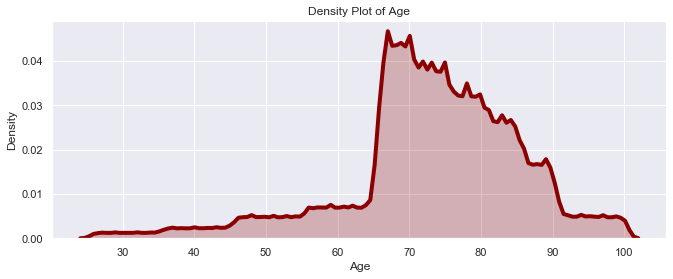

In [82]:
sns.distplot(claims['age2010'], hist = False, kde = True,
             color = 'darkred', kde_kws = {'shade': True, 'linewidth': 4})
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

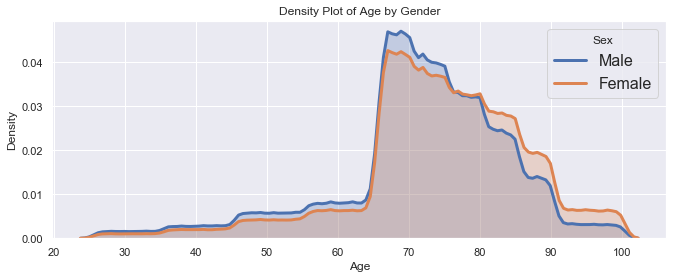

In [83]:
male_subset = claims[claims['male'] == 1]
female_subset = claims[claims['male'] == 0]

sns.distplot(male_subset['age2010'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'Male')

sns.distplot(female_subset['age2010'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'Female')
    
plt.legend(prop={'size': 16}, title = 'Sex')
plt.title('Density Plot of Age by Gender')
plt.xlabel('Age')
plt.ylabel('Density')

Our ages are fairly equally distibuted across lines of sex.

In [89]:
x = np.array(claims['race'])
white_p = len(np.where(x == 'White')[0])/x.shape[0]
black_p = len(np.where(x == 'Block')[0])/x.shape[0]
other_p = len(np.where(x == 'Other')[0])/x.shape[0]
hispanic_p = len(np.where(x == 'Hispanic')[0])/x.shape[0]

In [90]:
print("""
Race Statistics of Medicare Claims Data
----------
{} Medicare patient records
Proportion of Patients with Race as White: {} 
Proportion of Patients with Race as Black: {} 
Proportion of Patients with Race as Hispanic: {} 
Proportion of Patients with Race as Other: {} 

"""
      .format(
          x.shape[0],
          white_p, 
          black_p,
          hispanic_p,
          other_p
     ))


Race Statistics of Medicare Claims Data
----------
1023952 Medicare patient records
Proportion of Patients with Race as White: 0.8395686516555464 
Proportion of Patients with Race as Black: 0.09944802100098442 
Proportion of Patients with Race as Hispanic: 0.022293037173617514 
Proportion of Patients with Race as Other: 0.03869029016985171 




### 2.2 Illness